In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider, IntSlider

In [3]:
# Keras functions
from keras.models import Sequential, Model
from keras.layers import Input, Lambda, concatenate
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose, UpSampling2D
from keras.optimizers import SGD, Adam
from keras import metrics

# Keras dataset
from keras.datasets import mnist

# Keras utilis function
from keras.utils import np_utils

from keras import backend as K

Using TensorFlow backend.


In [4]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


In [5]:
x_train = x_train0.reshape(60000, -1)
x_test = x_test0.reshape(10000, -1)

x_train -= x_train.min()
x_train = x_train/x_train.max()

## Autoencoder

將 activation function 改成 relu

In [6]:
x = Input(shape=(784,))

enc_1 = Dense(100, activation='relu')
enc_2 = Dense(2, activation='relu')

h = enc_2(enc_1(x))

dec_2 = Dense(100, activation='relu')
dec_1 = Dense(784, activation='relu')

x_hat = dec_1(dec_2(h))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
autoencoder = Model(x, x_hat)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(loss='mse', optimizer=Adam())

In [9]:
autoencoder.fit(x_train, x_train, batch_size=1024, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0855
Epoch 2/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0701
Epoch 3/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0669
Epoch 4/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0649
Epoch 5/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0631
Epoch 6/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0617
Epoch 7/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.0603
Epoch 8/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0595
Epoch 9/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.0591
Epoch 10/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.0585
Epoch 11/100
60000/60000 [==============================] - 3s 47us/step - loss: 

60000/60000 [==============================] - 2s 41us/step - loss: 0.0473
Epoch 91/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0473
Epoch 92/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0472
Epoch 93/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0472
Epoch 94/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0472
Epoch 95/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0472
Epoch 96/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0472
Epoch 97/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.0471
Epoch 98/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0471
Epoch 99/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0471
Epoch 100/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0471


### 視覺化

In [10]:
Encoder = Model(x, h)
Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [11]:
h_input = Input(shape=(2,))
Decoder = Model(h_input, dec_1(dec_2(h_input)))

Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [12]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx, Encoder.predict(x_train[idx: idx+1])))

第 25975 圖的 latent 表示為 [[11.07718    3.5008311]]


In [13]:
indices = np.random.randint(x_test.shape[0], size=3000)

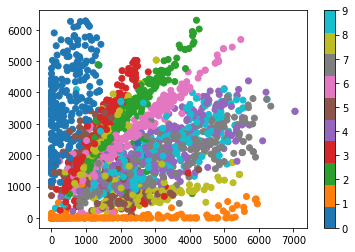

In [14]:
latents = Encoder.predict(x_test[indices])
plt.scatter(latents[:, 0], latents[:, 1], c=y_test0[indices], cmap="tab10")
plt.colorbar()
plt.show()

<span style="color:blue;">可以發現4、5、7、8這幾個數字混雜在一起，分類的並不是很好</span>

### Decorder

In [15]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [16]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1) * digit_size: (n - i) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

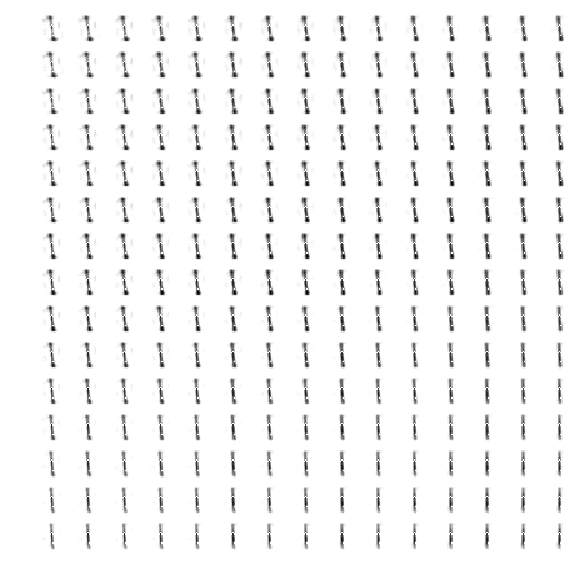

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys')
plt.axis('off')
plt.show()

<span style="color:blue;">看起來是所有數字都不小心壓成1的形狀了!</span>

## VAE

In [89]:
enc_1 = Dense(100, activation='relu')
#enc_2 = Dense(2, activation='relu')

enc_mean = Dense(2)
enc_log_var = Dense(2)

dec_2 = Dense(100, activation='relu')
dec_1 = Dense(784, activation='sigmoid')

In [90]:
x = Input(shape=(784,))
enc_x = enc_1(x)

z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)

In [91]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(2,), mean=0., stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [92]:
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

In [93]:
dec_x = dec_2(z)
x_hat = dec_1(dec_x)

In [94]:
VAE = Model(x, x_hat)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 100)          78500       input_6[0][0]                    
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 2)            202         dense_21[0][0]                   
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 2)            202         dense_21[0][0]                   
__________________________________________________________________________________________________
lambda_4 (

In [95]:
def vae_loss(x, x_recon):  
    recovery_loss = 784 * metrics.binary_crossentropy(x, x_recon)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return recovery_loss + kl_loss

In [96]:
VAE.compile(loss=vae_loss, optimizer=Adam())

In [97]:
VAE.fit(x_train, x_train, batch_size=32, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 26s 441us/step - loss: 190.5695
Epoch 2/100
60000/60000 [==============================] - 8s 133us/step - loss: 170.6696
Epoch 3/100
60000/60000 [==============================] - 8s 131us/step - loss: 166.6022
Epoch 4/100
60000/60000 [==============================] - 8s 126us/step - loss: 164.0479
Epoch 5/100
60000/60000 [==============================] - 8s 129us/step - loss: 162.5154
Epoch 6/100
60000/60000 [==============================] - 8s 131us/step - loss: 161.4100
Epoch 7/100
60000/60000 [==============================] - 8s 132us/step - loss: 160.4192
Epoch 8/100
60000/60000 [==============================] - 8s 128us/step - loss: 159.5992
Epoch 9/100
60000/60000 [==============================] - 8s 131us/step - loss: 158.9140
Epoch 10/100
60000/60000 [==============================] - 8s 135us/step - loss: 158.3044
Epoch 11/100
60000/60000 [==============================] - 8s 131us/step - loss: 157.6584
Epoch 1

60000/60000 [==============================] - 9s 153us/step - loss: 147.6290
Epoch 92/100
60000/60000 [==============================] - 8s 138us/step - loss: 147.5969
Epoch 93/100
60000/60000 [==============================] - 8s 140us/step - loss: 147.5486
Epoch 94/100
60000/60000 [==============================] - 8s 138us/step - loss: 147.5068
Epoch 95/100
60000/60000 [==============================] - 9s 146us/step - loss: 147.4562
Epoch 96/100
60000/60000 [==============================] - 9s 146us/step - loss: 147.4580
Epoch 97/100
60000/60000 [==============================] - 8s 136us/step - loss: 147.4493
Epoch 98/100
60000/60000 [==============================] - 8s 138us/step - loss: 147.3107
Epoch 99/100
60000/60000 [==============================] - 8s 135us/step - loss: 147.3443
Epoch 100/100
60000/60000 [==============================] - 8s 133us/step - loss: 147.3472


In [98]:
VAE_Encoder = Model(x, z_mean)

VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [99]:
VAE_Decoder = Model(h_input, dec_1(dec_2(h_input)))

VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_25 (Dense)             (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [100]:
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx, VAE_Encoder.predict(x_train[idx: idx+1])))

第 33108 圖的 latent 表示為 [[ 2.5882556 -0.6363866]]


In [101]:
# indices = np.random.randint(x_test.shape[0], size=1000)
VAE_latents = VAE_Encoder.predict(x_test[indices])

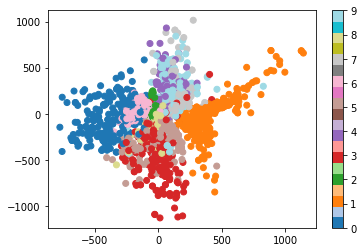

In [102]:
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()
plt.show()

In [103]:
def normalized(x):
    x -= x.min()
    x /= x.max()
    return x

In [104]:
grid_x_vae = np.linspace(-4+0.05, 4-0.05, n)
grid_y_vae = np.linspace(-4+0.05, 4-0.05, n)
VAE_figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n-i-1) * digit_size: (n - i) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = normalized(digit)

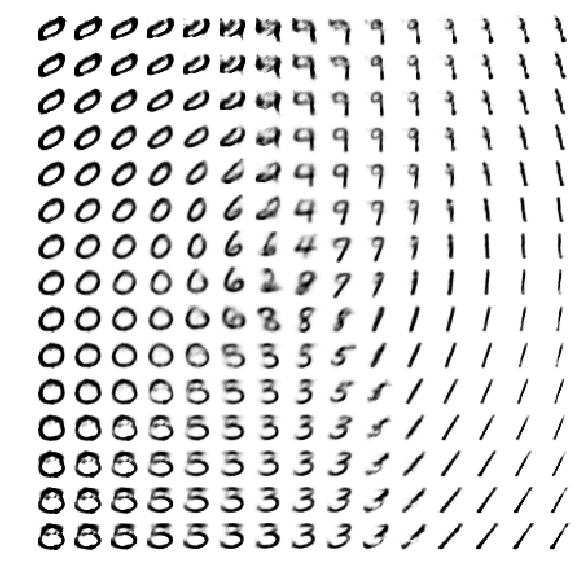

In [105]:
plt.figure(figsize=(10, 10))
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()

<span style="color:blue;">我沒有把改變模型參數的過程記錄下來，因為code會很亂~~</span style>

<span style="color:blue;">不過我增加層數、改其他activation後，覺得以上的這一個模型最能清楚地展現數字改變的規律，也能看出各個數字的形狀</span style>

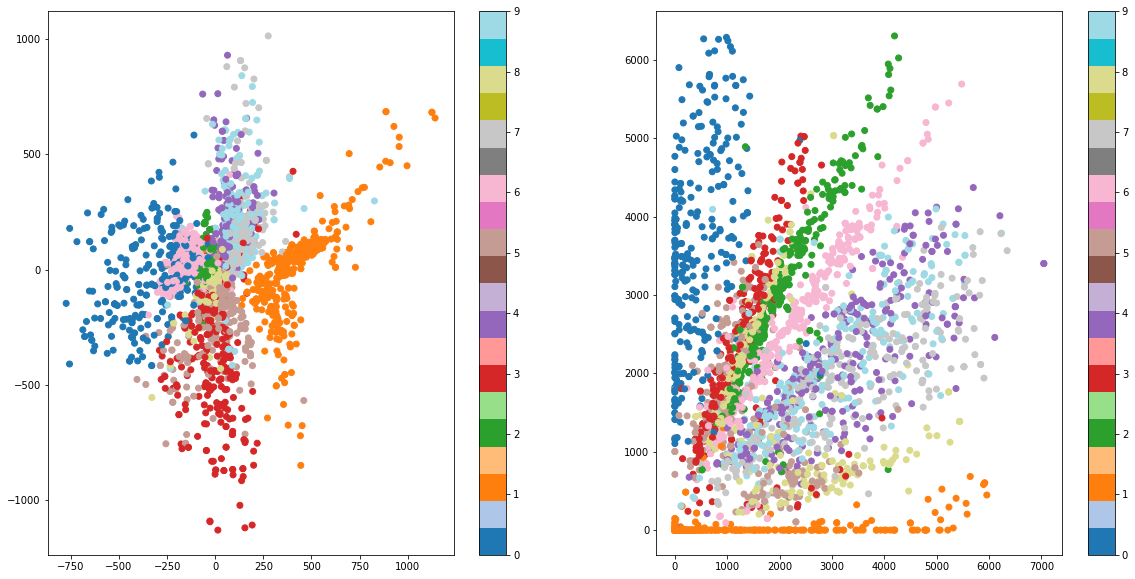

In [107]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(latents[:, 0], latents[:, 1], c=y_test0[indices], cmap='tab20')
plt.colorbar()
plt.show()

In [108]:
def inBetween(t, idx_1, idx_2):
    data_0 = x_train0[idx_1]
    data_1 = x_train0[idx_2]
    data_t = (1-t)*x_train0[idx_1] + t*x_train0[idx_2]

    mu_0 = VAE_Encoder.predict(x_train[idx_1:idx_1+1]).squeeze()
    mu_1 = VAE_Encoder.predict(x_train[idx_2:idx_2+1]).squeeze()
    mu_t = (1-t)*mu_0 + t*mu_1

    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 1, 2)
    ax1.scatter(mu_0[0], mu_0[1])
    ax1.scatter(mu_1[0], mu_1[1])
    ax1.scatter(mu_t[0], mu_t[1])

    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')

In [109]:
interact(inBetween, t = FloatSlider(value=0.5, min=0, max=1.0, step=0.02,),
        idx_1 = IntSlider(value = 12, min = 0, max = 59999, step=1,),
        idx_2 = IntSlider(value = 1000, min=0, max=59999, step=1,))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.02), IntSlider(value=12, descrip…

<function __main__.inBetween(t, idx_1, idx_2)>